### Contents
- Import active cust df
- Import departments df
- Split df in to multiple df's by fam_status
- N_dependants for each fam type
- Income for each fam type
- Summary so far..
- Aggregate mean order_number grouped by department id for each fam type
- Age stats of family types
- Defining customer profiles
- Merging df's
- Visualizations
- Q7 - max, min, mean stats
- Q8 - Comparing regions and profiles

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\4.0 Python\Instacart Basket Analysis"

### Import active customer only df

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Active Cust only.pkl'))

In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_spend',
       'spend_flag', 'order_freq', 'order_freq_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_flag'],
      dtype='object')

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,product_name,aisle_id,...,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
4,431534,1,5,4,15,28.0,196,1,Soda,77,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
5,3367565,1,6,2,7,19.0,196,1,Soda,77,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
6,550135,1,7,1,9,20.0,196,1,Soda,77,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
7,3108588,1,8,1,14,14.0,196,2,Soda,77,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
8,2295261,1,9,1,16,0.0,196,4,Soda,77,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity


In [6]:
# describe without scientific notation
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,aisle_id,department_id,prices,max_order,mean_spend,order_freq,age,n_dependants,income
count,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000,24414876.00000
mean,1710460.24578,102912.52305,21.94990,2.74795,13.36244,10.08523,25590.42620,8.37621,71.17743,9.92931,11.38687,38.48836,nan,8.50655,49.45734,1.50200,99895.04967
std,987271.05927,59467.26083,17.71938,2.08417,4.24734,8.14029,14076.28206,7.16177,38.23019,6.28267,487.37471,25.02275,nan,5.31457,18.48532,1.11917,43333.56597
min,3.00000,1.00000,5.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,5.00000,1.00000,0.00000,18.00000,0.00000,25903.00000
25%,856214.00000,51380.00000,9.00000,1.00000,10.00000,4.00000,13535.00000,3.00000,31.00000,4.00000,4.00000,18.00000,6.95703,5.00000,33.00000,0.00000,67524.00000
50%,1710492.00000,102528.50000,16.00000,3.00000,13.00000,7.00000,25232.00000,6.00000,83.00000,9.00000,7.00000,33.00000,7.38281,7.00000,49.00000,2.00000,96836.00000
75%,2565431.00000,154337.00000,29.00000,5.00000,16.00000,13.00000,37935.00000,11.00000,107.00000,16.00000,11.00000,52.00000,7.79688,10.00000,65.00000,3.00000,128160.00000
max,3421083.00000,206209.00000,99.00000,6.00000,23.00000,30.00000,49688.00000,137.00000,134.00000,21.00000,99999.00000,99.00000,15008.00000,30.00000,81.00000,3.00000,593901.00000


In [7]:
df['fam_status'].value_counts(dropna=False)

married                             17138475
single                               4015790
divorced/widowed                     2089212
living with parents and siblings     1171399
Name: fam_status, dtype: int64

### Import departments dictionary

In [8]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Departments_wrangled.csv'))

### Split df by fam_status 
Memory usage is high, so splitting df will speed up processing and simplyfy analysis

In [9]:
df_married = df[df['fam_status'] == 'married']

In [10]:
df_married['fam_status'].value_counts(dropna=False)

married                             17138475
single                                     0
living with parents and siblings           0
divorced/widowed                           0
Name: fam_status, dtype: int64

In [11]:
df_single = df[df['fam_status'] == 'single']

In [12]:
df_single['fam_status'].value_counts(dropna=False)

single                              4015790
married                                   0
living with parents and siblings          0
divorced/widowed                          0
Name: fam_status, dtype: int64

In [13]:
df_divorce = df[df['fam_status'] == 'divorced/widowed']

In [14]:
df_divorce['fam_status'].value_counts(dropna=False)

divorced/widowed                    2089212
single                                    0
married                                   0
living with parents and siblings          0
Name: fam_status, dtype: int64

In [15]:
df_kid = df[df['fam_status'] == 'living with parents and siblings']

In [16]:
df_kid['fam_status'].value_counts(dropna=False)

living with parents and siblings    1171399
single                                    0
married                                   0
divorced/widowed                          0
Name: fam_status, dtype: int64

### N_dependants for each fam type

In [17]:
# no single cust has children
df_single['n_dependants'].value_counts(dropna=False)

0    4015790
Name: n_dependants, dtype: int64

In [18]:
# no divorced cust has children
df_divorce['n_dependants'].value_counts(dropna=False)

0    2089212
Name: n_dependants, dtype: int64

In [19]:
df_kid['n_dependants'].value_counts(dropna=False)

1    403721
3    386910
2    380768
Name: n_dependants, dtype: int64

In [20]:
df_married['n_dependants'].value_counts(dropna=False)

3    5746626
2    5713463
1    5678386
Name: n_dependants, dtype: int64

### Income stats for each fam type

In [21]:
df_single['income'].describe()

count    4.015790e+06
mean     9.183190e+04
std      4.257449e+04
min      2.590300e+04
25%      6.214600e+04
50%      8.574200e+04
75%      1.138240e+05
max      5.840970e+05
Name: income, dtype: float64

In [22]:
# without scientific notation
df_single['income'].describe().apply(lambda x: format(x, 'f'))

count    4015790.000000
mean       91831.902332
std        42574.492481
min        25903.000000
25%        62146.000000
50%        85742.000000
75%       113824.000000
max       584097.000000
Name: income, dtype: object

In [23]:
df_married['income'].describe().apply(lambda x: format(x, 'f'))

count    17138475.000000
mean       101761.553980
std         43576.316122
min         25911.000000
25%         69111.000000
50%         99093.000000
75%        130675.000000
max        593901.000000
Name: income, dtype: object

In [24]:
df_divorce['income'].describe().apply(lambda x: format(x, 'f'))

count    2089212.000000
mean      116225.054240
std        40967.112313
min        29011.000000
25%        95975.000000
50%       116264.000000
75%       143285.000000
max       578251.000000
Name: income, dtype: object

In [25]:
df_kid['income'].describe().apply(lambda x: format(x, 'f'))

count    1171399.000000
mean       71103.858600
std        23876.564898
min        25937.000000
25%        56439.000000
50%        70184.000000
75%        85013.000000
max       396364.000000
Name: income, dtype: object

### Summary so far..
- Married family type are the most common - 17mil
- Only married family types have dependants - max 3
- Divorced family type have the highest average income - $116,225

### Department/mean order_number

In [26]:
# divorced df
divorce_dep = df_divorce.groupby('department_id').agg({'order_number' : ['mean']})

In [27]:
divorce_dep

,order_number
,mean
department_id,
1,20.674919
2,22.480371
3,21.940056
4,22.791446
5,20.745188
6,21.536516
7,22.308358
8,20.612424


In [28]:
df_dep.reset_index(inplace = True)

In [29]:
df_dep.drop(columns='index')

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<AxesSubplot:xlabel='department_id'>

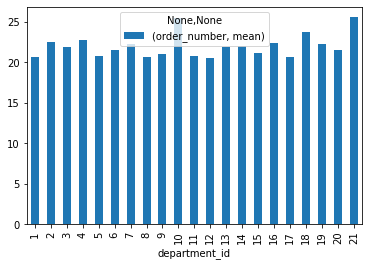

In [30]:
divorce_dep.plot.bar()

In [31]:
# married df
married_dep = df_married.groupby('department_id').agg({'order_number' : ['mean']})

<AxesSubplot:xlabel='department_id'>

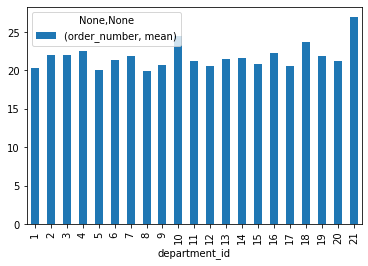

In [32]:
married_dep.plot.bar()

In [33]:
# single df
single_dep = df_single.groupby('department_id').agg({'order_number' : ['mean']})

<AxesSubplot:xlabel='department_id'>

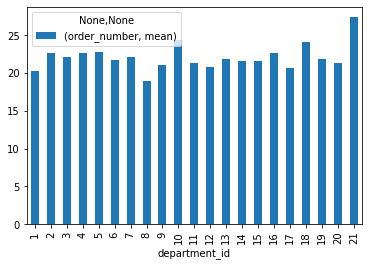

In [34]:
single_dep.plot.bar()

In [35]:
# kid df
kid_dep = df_kid.groupby('department_id').agg({'order_number' : ['mean']})

<AxesSubplot:xlabel='department_id'>

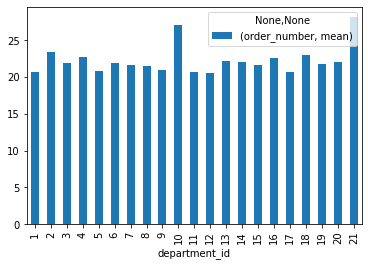

In [36]:
kid_dep.plot.bar()

### Age stats of family types

In [38]:
df_single['age'].describe().apply(lambda x: format(x, 'f'))

count    4015790.000000
mean          38.642756
std           12.135874
min           18.000000
25%           28.000000
50%           39.000000
75%           49.000000
max           59.000000
Name: age, dtype: object

In [39]:
df_married['age'].describe().apply(lambda x: format(x, 'f'))

count    17138475.000000
mean           51.472643
std            17.331494
min            22.000000
25%            36.000000
50%            51.000000
75%            67.000000
max            81.000000
Name: age, dtype: object

In [40]:
df_divorce['age'].describe().apply(lambda x: format(x, 'f'))

count    2089212.000000
mean          70.507286
std            6.406543
min           60.000000
25%           65.000000
50%           71.000000
75%           76.000000
max           81.000000
Name: age, dtype: object

In [41]:
df_kid['age'].describe().apply(lambda x: format(x, 'f'))

count    1171399.000000
mean          19.503438
std            1.112696
min           18.000000
25%           19.000000
50%           19.000000
75%           21.000000
max           21.000000
Name: age, dtype: object

## Defining customer profiles
Based on the exploratory analysis I have done so far I will define four customer profiles.  
Customer A = (wealthy family) = Income > 130,000, N_dependants > 0  
Customer B = (wealthy single) = Income > 130,000, N_dependants = 0  
Customer C = (young family) = Age < 36, N_dependants > 0  
Customer D = (young single) = Age < 36, N_dependants = 0

I will check to see if there are customers who could fall in to profile of Customer A and Customer C:

In [47]:
df_A = df[(df['income'] > 130000) & (df['n_dependants'] > 0)]

In [48]:
# Checking the ages of these customers:
df_A['age'].value_counts(dropna=False)

48    118896
69    116551
64    116427
42    115569
50    112010
       ...  
22      2464
37      2360
23      2266
32      2206
30      1543
Name: age, Length: 64, dtype: int64

There are customers who will fall in to profile A and C, who are wealthy AND young. 

I will now check to see if there are customers who could fall in to profile of Customer B and D:

In [50]:
df_B = df[(df['income'] > 130000) & (df['n_dependants'] == 0)]

In [51]:
# checking the ages of these customers:
df_B['age'].value_counts(dropna=False)

57    44362
61    43993
58    42117
46    41660
53    40852
      ...  
37      471
28      442
27      247
25      202
38      108
Name: age, Length: 64, dtype: int64

There are customers who will fall in to profile B and D, who are single AND wealthy.

## Adjusting profiles
I will adjust the profiles so there is no overlap between customers.  

Customer A = (wealthy family, aged over 36) = Income > 130,000, N_dependants > 0, Age > 36.  
Customer B = (wealthy family, aged under 36) = Income > 130,000, N_dependants > 0, Age < 36.   
Customer C = (young family) = Age < 36, Income < 130,000,  N_dependants > 0.  
Customer D = (regular family) = Age >= 36, Income <= 130,000, N_dependants > 0.  
Customer E = (wealthy single, aged over 36) = Income > 130,000, N_dependants = 0, Age > 36.  
Customer F = (wealthy single, aged under 36) = Income > 130,000, N_dependants = 0, Age < 36.  
Customer G = (young single) = Age < 36, Income < 130,000, N_dependants = 0.  
Customer H = (regular single) = Age >= 36, Income <= 130,000, N_dependants = 0.


Now I can define a function that will create a customer profile flag based on these criteria.

I will create a df for customers with dependants to reduce memory usage when applying the function:

In [52]:
df_dependants = df[df['n_dependants'] > 0]

I will create a  df for customers with no dependants to reduce memory usage when applying the function:

In [54]:
df_nodependants = df[df['n_dependants'] == 0]

I will now create a function which I will apply to df_dependants. This function will assign a profile to each customer; either Customer profile A, B, C or D.

In [65]:
def depen(row):
    if (row['income'] > 130000) and (row['age'] > 36):
        return 'A'
    elif (row['income'] > 130000) and (row['age'] < 36):
        return 'B'
    elif (row['income'] < 130000) and (row['age'] < 36):
        return 'C'
    elif (row['income'] <= 130000) and (row['age'] >= 36):
        return 'D'
    else: return np.nan

Applying function to df_dependants:

In [66]:
df_dependants['customer_profile'] = df_dependants.apply(depen, axis=1)

<ipython-input-66-22487472b63e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dependants['customer_profile'] = df_dependants.apply(depen, axis=1)


In [79]:
df_dependants['customer_profile'].value_counts()

D    8828696
C    5119068
A    4296308
B      62442
Name: customer_profile, dtype: int64

In [80]:
df_dependants.shape

(18309874, 32)

I will now create a function to apply to df_nodependants. This function will assign a profile to each customer, either profile E, F, G or H.

In [81]:
def no_depen(row):
    if (row['income'] > 130000) and (row['age'] > 36):
        return 'E'
    elif (row['income'] > 130000) and (row['age'] < 36):
        return 'F'
    elif (row['income'] < 130000) and (row['age'] < 36):
        return 'G'
    elif (row['income'] <= 130000) and (row['age'] >= 36):
        return 'H'
    else: return np.nan

In [82]:
df_nodependants['customer_profile'] = df_nodependants.apply(no_depen, axis=1)

<ipython-input-82-0a7b82e332bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodependants['customer_profile'] = df_nodependants.apply(no_depen, axis=1)


In [84]:
df_nodependants['customer_profile'].value_counts()

H    2926232
G    1692472
E    1465627
F      19788
Name: customer_profile, dtype: int64

## Merging df's

In [87]:
frames = [df_dependants, df_nodependants]

In [88]:
df_profile = pd.concat(frames)

Checking that df with profile column is same size as original df:

In [89]:
df_profile.shape

(24414876, 32)

In [90]:
df.shape

(24414876, 31)

## Q6 Visualization

<AxesSubplot:>

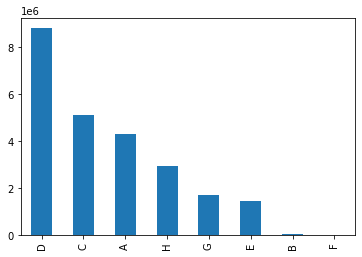

In [92]:
# Bar chart showing frequency of each customer profile
df_profile['customer_profile'].value_counts().plot.bar()

## Q7 - max, mean, min  
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [95]:
# max freq grouped by profile
df_profile.groupby('customer_profile').agg({'order_number' : ['max']})

,order_number
,max
customer_profile,
A,99
B,99
C,99
D,99
E,99
F,96
G,99
H,99


In [96]:
# mean freq grouped by profile
df_profile.groupby('customer_profile').agg({'order_number' : ['mean']})

,order_number
,mean
customer_profile,
A,21.872333
B,24.466097
C,21.870686
D,21.910876
E,22.518051
F,24.672579
G,21.845222
H,22.017757


In [97]:
# min freq grouped by profile
df_profile.groupby('customer_profile').agg({'order_number' : ['min']})

,order_number
,min
customer_profile,
A,5
B,5
C,5
D,5
E,5
F,5
G,5
H,5


In [102]:
# max expenditure grouped by profile
df_profile.groupby('customer_profile').agg({'prices' : ['max']})

,prices
,max
customer_profile,
A,99999
B,99999
C,99999
D,99999
E,99999
F,99999
G,99999
H,99999


In [103]:
# mean expenditure grouped by profile
df_profile.groupby('customer_profile').agg({'prices' : ['mean']})

,prices
,mean
customer_profile,
A,18.103096
B,250.434147
C,8.529563
D,7.898175
E,17.171566
F,343.277441
G,8.148684
H,8.396560


In [104]:
# min expenditure grouped by profile
df_profile.groupby('customer_profile').agg({'prices' : ['min']})

,prices
,min
customer_profile,
A,1
B,1
C,1
D,1
E,1
F,1
G,1
H,1


## Q8
Compare customer profiles with regions and departments.

In [105]:
# crosstab comparing regions and profiles
prof_region = pd.crosstab(df_profile['region'], df_profile['customer_profile'])

In [106]:
prof_region

customer_profile,A,B,C,D,E,F,G,H
region,,,,,,,,
Midwest,1030747,11800,1187810,2042752,342698,6003,380428,707812
Northeast,768108,9564,907911,1564499,250741,3623,308962,501620
South,1405961,25455,1718933,2939504,491819,7406,577191,961766
West,1091492,15623,1304414,2281941,380369,2756,425891,755034


In [107]:
prof_dep = pd.crosstab(df_profile['department_id'], df_profile['customer_profile'])

In [108]:
prof_dep

customer_profile,A,B,C,D,E,F,G,H
department_id,,,,,,,,
1,292332,5255,341151,583124,100205,1301,109852,194078
2,4839,164,5716,9507,1612,44,1951,3327
3,161338,3026,184134,313092,53905,1038,61650,104946
4,1283618,12389,1514627,2603064,439717,4291,502884,865824
5,20081,1792,22357,35715,7709,606,6997,12630
6,35502,525,41481,70340,12183,142,14258,23446
7,343231,5481,419651,755685,117438,1844,142013,250690
8,12982,276,14822,25740,5459,151,5073,7567
9,115778,1847,132980,225622,38766,498,44120,74006


## Q9
Produce suitable charts to illustrate your results and export them in your project folder.

## Export

In [135]:
# export df with cust profile column
df_profile.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Customer Profile.pkl'))